In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/Musoloo/Data-Mining-Week-1_Benito-Priyasha/refs/heads/main/breast-cancer.csv')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
72,859717,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,...,23.32,33.82,151.60,1681.0,0.1585,0.73940,0.65660,0.18990,0.3313,0.13390
150,871001501,B,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,...,14.16,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435
208,8810158,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,...,14.55,29.16,99.48,639.3,0.1349,0.44020,0.31620,0.11260,0.4128,0.10760
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.17000,0.10170,0.2369,0.06599
521,91762702,M,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,...,29.92,26.93,205.70,2642.0,0.1342,0.41880,0.46580,0.24750,0.3157,0.09671
148,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,...,15.85,19.85,108.60,766.9,0.1316,0.27350,0.31030,0.15990,0.2691,0.07683
428,90769601,B,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083
32,85382601,M,17.02,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,...,20.88,32.09,136.10,1344.0,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482
213,881094802,M,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,...,18.07,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
435,908489,M,13.98,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,...,17.04,30.80,113.90,869.3,0.1613,0.35680,0.40690,0.18270,0.3179,0.10550


In [11]:
df.info()
# info() digunakan untuk menunjukkan berapa jumlah data pada dataset serta data typenya dan juga jumlah non-null pada tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df.isnull().sum()
# isnull().sum() digunakan untuk menunjukkan data yang kosong (null), dan pada dataset ini tidak ada data yang null

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<ipython-input-14-f1cc4d0359bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='viridis')


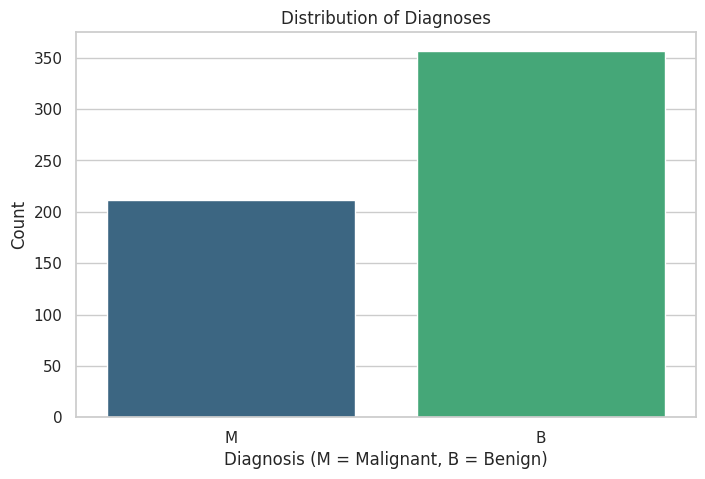

In [14]:

# Setting up visual style
sns.set(style="whitegrid")

# Plotting the distribution of diagnosis
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diagnosis', palette='viridis')
plt.title('Distribution of Diagnoses')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

# M (Malignant): Mengindikasikan tumor ganas, B(Benign): Mengindikasikan tumor jinak
# Tinggi dari masing-masing batang menunjukkan jumlah kasus dalam setiap kategori diagnosis. Grafik ini berguna untuk memahami perbandingan jumlah antara kasus ganas dan jinak dalam dataset, memberikan wawasan awal tentang prevalensi kedua jenis diagnosis tersebut.


<ipython-input-17-db125865f534>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette='viridis')


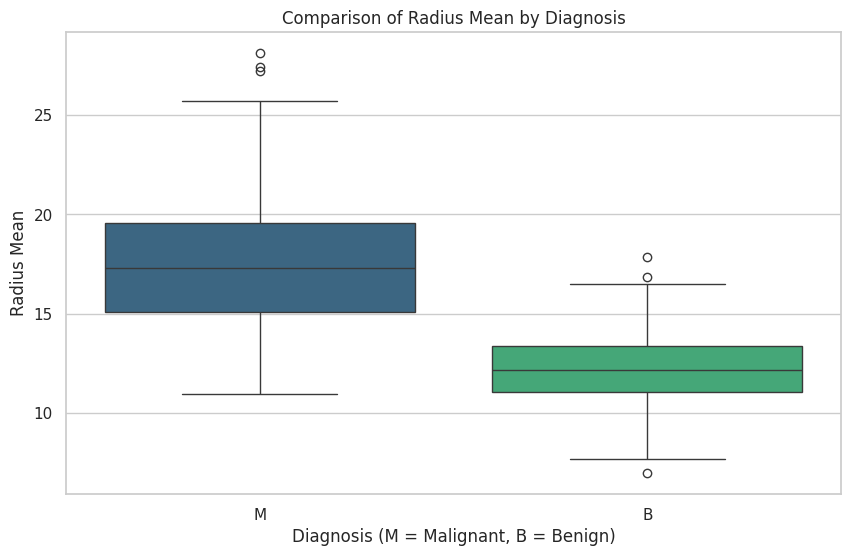

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette='viridis')
plt.title('Comparison of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Radius Mean')
plt.show()

# Box Plot: Menampilkan distribusi radius_mean untuk diagnosis Malignant dan Benign. Perbandingan ini bisa menunjukkan perbedaan ukuran rata-rata radius yang signifikan antara kedua kategori.

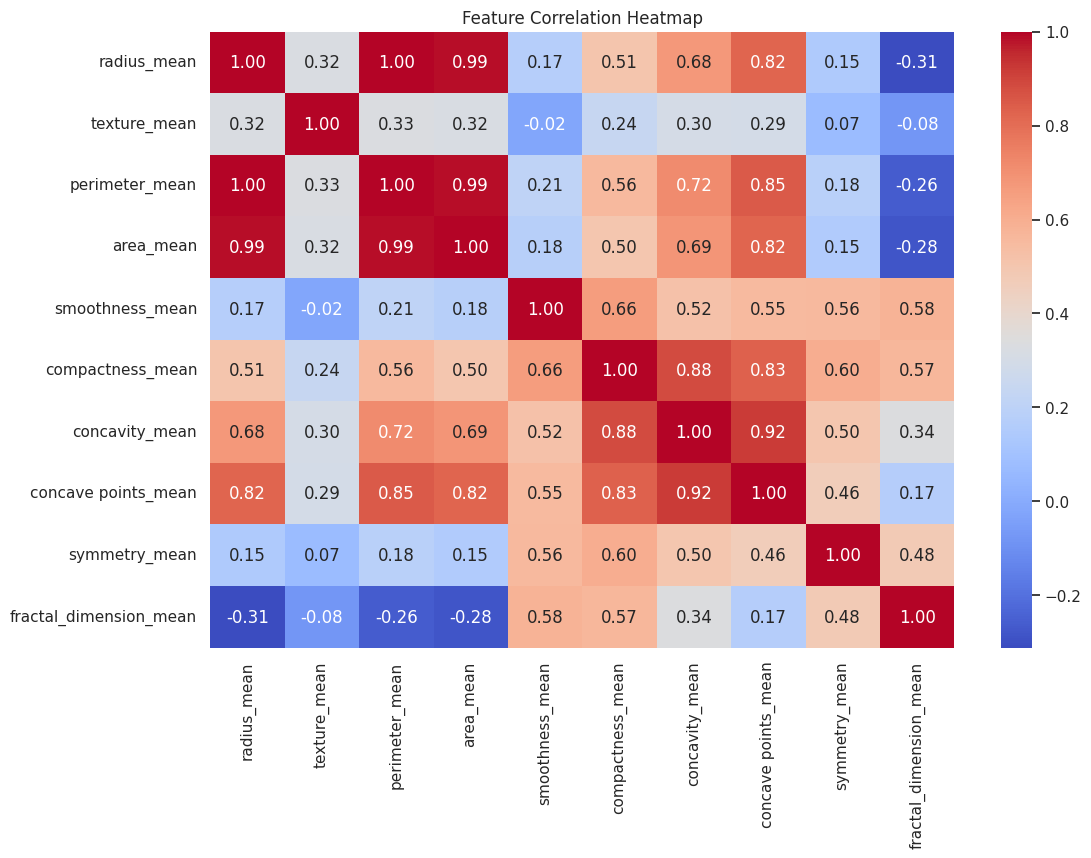

In [18]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
correlation_matrix = df[features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

#Heatmap Korelasi: Menggambarkan hubungan antara fitur-fitur utama yang mungkin berkaitan dengan diagnosis. Korelasi tinggi (mendekati 1 atau -1) menunjukkan hubungan kuat antar-fitur, yang mungkin bermanfaat untuk analisis lebih lanjut atau pengurangan fitur.

In [20]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# y merupakan data yang menjadi target, dan X merupakan variabel-variabel yang akan mempengaruhi hasil dari y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# memisah data menjadi train dan test, train memiliki 80% data dan test sisanya, lalu random state yang dipakai adalah 42

In [22]:
X_train.shape,X_test.shape
# memeriksa dimensi train data dan test data, memastikan bahwa pembagian data sudah sesuai dan data memiliki jumlah fitur yang sama.

((455, 31), (114, 31))

In [23]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
dt_entropy.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria entropy, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
y_pred_entropy = dt_entropy.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_entropy) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy

In [25]:
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_entropy)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_entropy

Model accuracy score with criterion entropy: 0.9649122807017544


In [26]:
print("Training set score (Entropy): ", dt_entropy.score(X_train, y_train))
print("Test set score (Entropy): ", dt_entropy.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_entropy

Training set score (Entropy):  0.9802197802197802
Test set score (Entropy):  0.9649122807017544


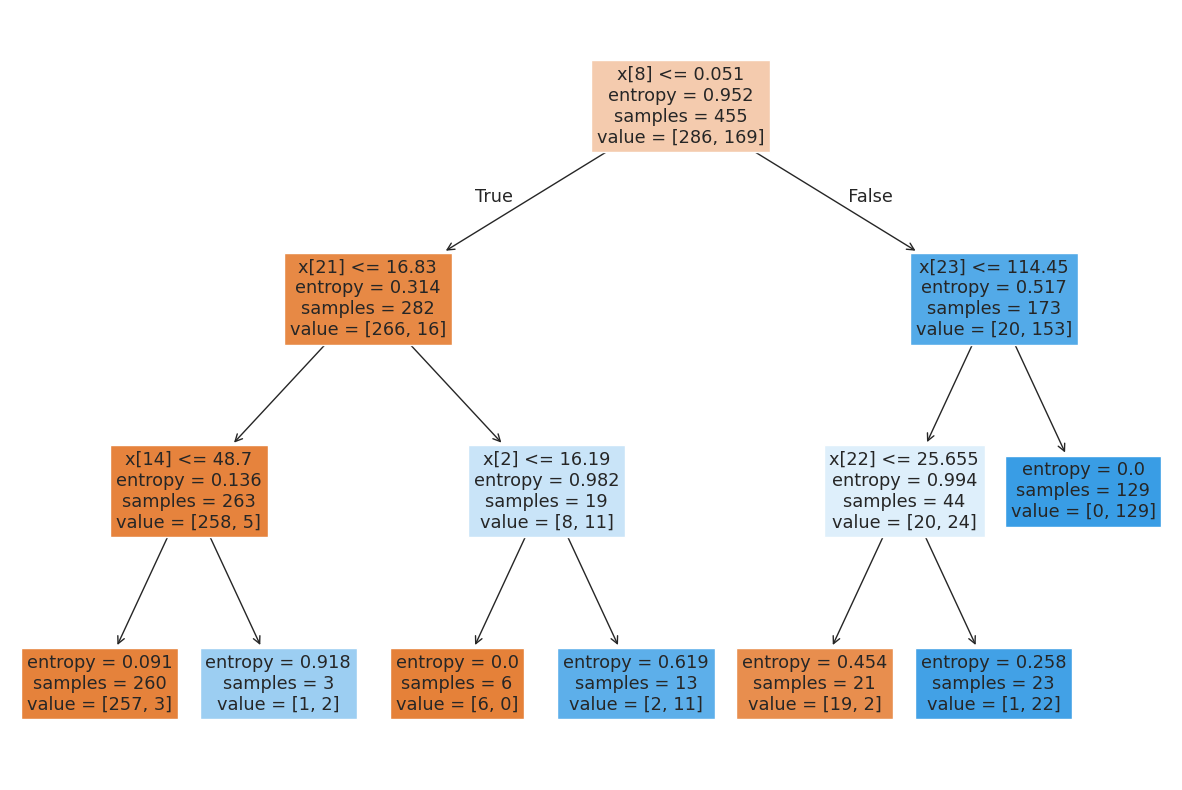

In [27]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_entropy dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [28]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_gini.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria Gini Index, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
y_pred_gini = dt_gini.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_gini) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_gini

In [30]:
print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_gini

Model accuracy score with criterion gini index: 0.9473684210526315


In [31]:
print("Training set score (Gini Index): ", dt_gini.score(X_train, y_train))
print("Test set score (Gini Index): ", dt_gini.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_gini

Training set score (Gini Index):  0.978021978021978
Test set score (Gini Index):  0.9473684210526315


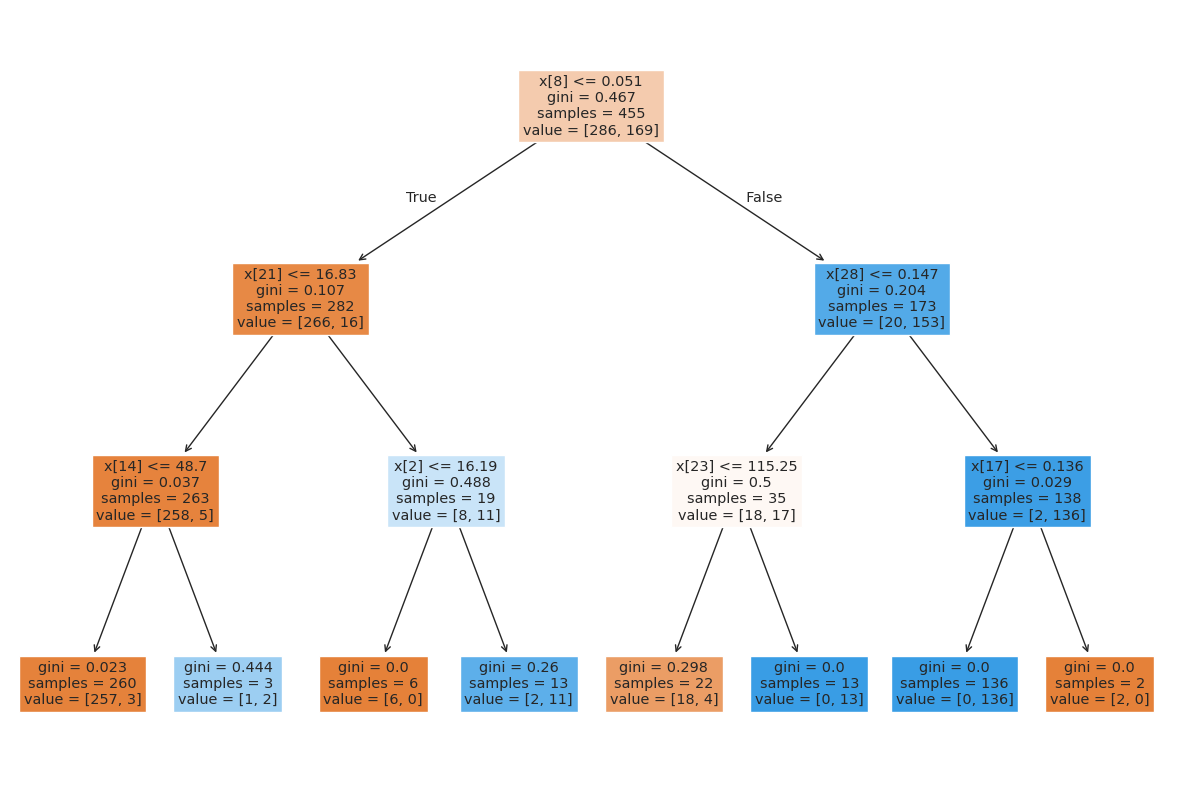

In [32]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_gini dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [33]:
print("Confusion Matrix Entropy\n",confusion_matrix(y_test, y_pred_entropy))
print("Confusion Matrix Gini Index\n",confusion_matrix(y_test, y_pred_gini))
# Code ini akan menampilkan dua confusion matrix, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Confusion Matrix Entropy
 [[71  0]
 [ 4 39]]
Confusion Matrix Gini Index
 [[69  2]
 [ 4 39]]


In [34]:
print("Classification Report Entropy\n",classification_report(y_test, y_pred_entropy))
print("Classification Report Gini Index\n",classification_report(y_test, y_pred_gini))
# Code ini akan menampilkan dua Classification Report, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Classification Report Entropy
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Classification Report Gini Index
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Perbandingan antara penggunaan entropi dan indeks Gini sebagai kriteria pembelahan pada decision tree menunjukkan hasil yang serupa.
# Hal ini mengindikasikan bahwa kedua kriteria tersebut memberikan hasil yang tidak jauh berbeda pada dataset ini.

In [35]:
nb = GaussianNB()
# Code di atas digunakan untuk membuat model Naive Bayes Gaussian.
nb.fit(X_train, y_train)
# Code di atas digunakan untuk melatih model menggunakan data pelatihan X_train dan y_train.

GaussianNB()

In [36]:
y_pred_nb = nb.predict(X_test)
# Code tersebut menggunakan model Naive Bayes untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_nb

In [37]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_nb))
# Code ini akan menampilkan confusion matrix untuk model Naive Bayes
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))
# Code ini akan menampilkan accuracy score untuk model Naives Bayes

Confusion Matrix
 [[70  1]
 [43  0]]
Accuracy Score:  0.6140350877192983


In [38]:
print("Classification Report Naive Bayes\n",classification_report(y_test, y_pred_nb))
# Code ini akan menampilkan Classification report untuk model Naive Bayes

Classification Report Naive Bayes
               precision    recall  f1-score   support

           B       0.62      0.99      0.76        71
           M       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



In [39]:
# Hasil klasifikasi menunjukkan bahwa model Naive Bayes mampu memprediksi kelas 0 dengan akurasi yang cukup baik, terlihat dari nilai presisi, recall, dan F1-score yang mendekati 0.8.
# Namun, model kurang optimal dalam memprediksi kelas 1, dengan nilai metrik yang sedikit lebih rendah.
# Secara keseluruhan, model mencapai akurasi sekitar 77% dalam mengklasifikasikan data.

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
# Code tersebut mengimpor, membuat, dan melatih model Logistic Regression menggunakan data pelatihan untuk memprediksi target.

LogisticRegression(max_iter=1000)

In [41]:
y_pred_log = model.predict(X_test)
# Code tersebut menggunakan model Logistic Regression untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_log

In [42]:
# Displaying the confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_log))
# Code ini akan menampilkan confusion matrix untuk model Logistic Regression
print("Accuracy Score Logistic: ",accuracy_score(y_test, y_pred_log))
# Code ini akan menampilkan accuracy score untuk model Logistic Regression

Confusion Matrix:
 [[70  1]
 [ 4 39]]
Accuracy Score Logistic:  0.956140350877193


In [43]:
print('Classification Report Logistic:\n',classification_report(y_test, y_pred_log))
# Code ini akan menampilkan Classification report untuk model Logistic Regression

Classification Report Logistic:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [44]:
# The logistic regression model demonstrates high accuracy (96%) and balanced performance across both classes. The slight difference in recall for class "M" (0.91) suggests that the model could be slightly better at detecting "M" instances. However, overall, the model achieves a good trade-off between precision and recall, making it effective for this classification task.